In [2]:
import TurbPy as tb
from TurbPy.imports import *

In [3]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_800ppc/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck
data = dirs + 'data/'
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

In [4]:
twci[1119]

154.54150920000004

In [5]:
def Fn(t, min, max, jfilt = True, wfilt = False):
  print(twci[t])
  el = tb.load_hydro_fil(dirs, times[t], 'electron')
  ion = tb.load_hydro_fil(dirs, times[t], 'ion')

  if wfilt == True:
    jfilt = False
    wV = tb.w_calc(dirs, t, sp = 'electron')
    w = np.sqrt(wV[0]**2 + wV[1]**2 + wV[2]**2)
    j = w
  if jfilt == True:
    j = (np.sqrt((el['jx'] + ion['jx'])**2 + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2))[100:1180,:]

  jrms = np.sqrt(np.mean(j**2))
  jnrm = (j/jrms)

  df = pd.DataFrame()
  jmask = np.linspace(min, max, 50)
  JiE, JeE, JE = tb.JE_calc(dirs, times[t])
  JiE = JiE[100:1180,:]
  JeE = JeE[100:1180,:]
  JE =  JE[100:1180,:]
  pthe, pide = (tb.ps_calc(dirs, times[t], 'electron'))
  pthi, pidi = tb.ps_calc(dirs, times[t], 'ion')
  row = []
  print(jnrm.shape)
  print(JeE.shape)
  for fn in jmask:  
    jfil = np.where((jnrm > fn))
    JEfilM = np.where((jnrm > fn) & (JeE < 0))
    pidifilM = np.where((jnrm > fn) & (pidi < 0))
    pidefilM = np.where((jnrm > fn) & (pide < 0))
    JEM =   np.sum(JeE[JEfilM])
    pidiM = np.sum(pidi[pidifilM])
    pideM = np.sum(pide[pidefilM])

    JEfilP = np.where((jnrm > fn) & (JeE > 0))
    pidifilP = np.where((jnrm > fn) & (pidi > 0))
    pidefilP = np.where((jnrm > fn) & (pide > 0))
    JEP =   np.sum(JeE[JEfilP])
    pidiP = np.sum(pidi[pidifilP])
    pideP = np.sum(pide[pidefilP])

    JET = np.sum(JeE[jfil])
    pideT = np.sum(pide[jfil])

    jfrn = len(jfil[0])
    JEPcnt = np.size(JEfilP)
    JEMcnt = np.size(JEfilM)
    row.append({
                'jfrn': jfrn, 
                'JEPcnt' : JEPcnt, 
                'JEP': JEP, 
                'pideP': pideP, 
                'pidiP': pidiP, 
                'JEMcnt' : JEMcnt,
                'JEM': JEM, 
                'pideM': pideM, 
                'pidiM': pidiM,
                'JE' : JET,
                'pide' : pideT
                })
  df =pd.DataFrame(row)
  return jmask, df

In [6]:
t = [510, 1124]
jmask, dfJ_510 = Fn(t[0], 0, 3, jfilt = True)
wmask, dfw_510 = Fn(t[0], 0, 3, wfilt = True)
jmask, dfJ_1124 = Fn(t[1], 0, 3, jfilt = True)
wmask, dfw_1124 = Fn(t[1], 0, 3, wfilt = True)

70.43446800000001
(1080, 2560)
(1080, 2560)
70.43446800000001
(1080, 2560)
(1080, 2560)
155.23204320000002
(1080, 2560)
(1080, 2560)
155.23204320000002
(1080, 2560)
(1080, 2560)


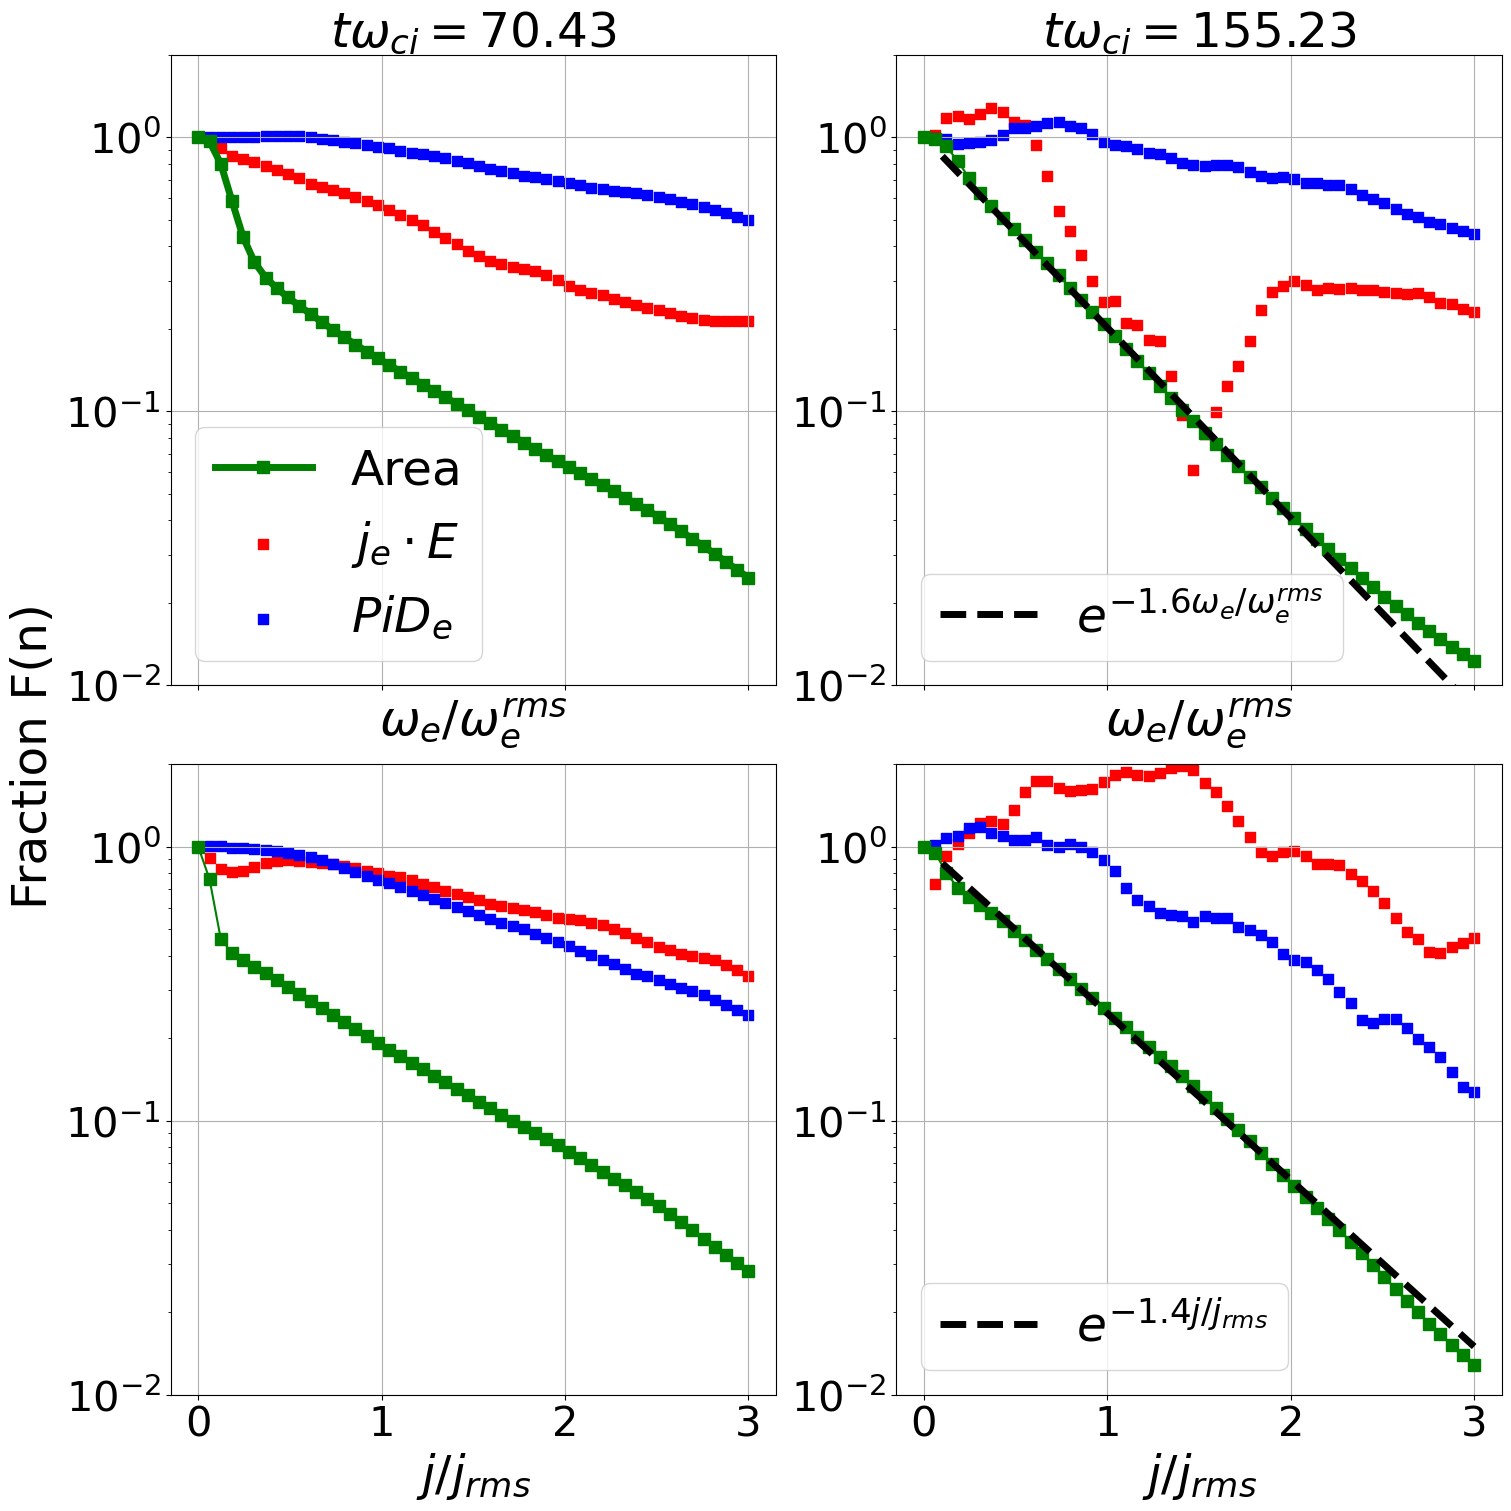

In [10]:
import matplotlib
fig, ax = plt.subplots(2,2, figsize = (15, 15), sharex = 'col', layout = 'constrained')
# subfigs = fig5.subfigures(2, 1)

# ax0 = subfigs[0].subplots(1, 2, sharex=True, sharey = True)
# ax1 = subfigs[1].subplots(1, 2, sharex=ax0[0], sharey = True)

matplotlib.rcParams['lines.markersize'] = 2
lw = 5
txt = 35
msl = 8
ms = 50
ax[0,0].semilogy(wmask, dfw_510['jfrn']/dfw_510['jfrn'][0], marker = 's', markersize = msl,  c = 'green', linewidth = lw, label = 'Area')
ax[0,0].scatter(wmask, dfw_510['JE']/np.abs(dfw_510['JE'][0]), marker = 's', c = 'red', s = ms, label = r'$j_e \cdot E$')
ax[0,0].scatter(wmask[dfw_510['JE'] < 0], np.abs(dfw_510['JE'][dfw_510['JE'] < 0])/np.abs(dfw_510['JE'][0]),s = ms, marker = 's', c = 'none', edgecolors = 'r')
ax[0,0].scatter(wmask, dfw_510['pide']/np.abs(dfw_510['pide'][0]),s = ms, marker = 's', c = 'blue', label = r'$PiD_e$')
ax[0,0].scatter(wmask[dfw_510['pide'] < 0], np.abs(dfw_510['pide'][dfw_510['pide'] < 0])/np.abs(dfw_510['pide'][0]),s = ms, marker = 's', c = 'none', edgecolors = 'blue')
ax[0,0].grid()


ax[0,1].semilogy(wmask, dfw_1124['jfrn']/dfw_1124['jfrn'][0], marker = 's', markersize = msl,  c = 'green')
ax[0,1].scatter(wmask, dfw_1124['JE']/np.abs(dfw_1124['JE'][0]), marker = 's', c = 'red', s = ms)
ax[0,1].scatter(wmask[dfw_1124['JE'] < 0], np.abs(dfw_1124['JE'][dfw_1124['JE'] < 0])/np.abs(dfw_1124['JE'][0]),s = ms, marker = 's', c = 'none', edgecolors = 'r')
ax[0,1].scatter(wmask, dfw_1124['pide']/np.abs(dfw_1124['pide'][0]),s = ms, marker = 's', c = 'blue')
ax[0,1].scatter(wmask[dfw_1124['pide'] < 0], np.abs(dfw_1124['pide'][dfw_1124['pide'] < 0])/np.abs(dfw_1124['pide'][0]),s = ms, marker = 's', c = 'none', edgecolors = 'blue')
ax[0,1].grid()

x1 = np.linspace(0.1, 3, 200)
y1 = np.exp(- 1.6 * x1)
ax[0,1].plot(x1, y1, c = 'black', linestyle = 'dashed', linewidth = lw, label = r'$e^{-1.6 \omega_e/\omega_e^{rms}}$')
# x2 = np.linspace(0.1, 3, 200)
# y2 = np.exp(- 1.6 * x2**2)
# ax[0,1].plot(x2, y2, c = 'black', linestyle = 'dashed', linewidth = lw, label = r'$e^{-1.6 \omega^e/\omega^e_{rms}}$')


ax[1,0].semilogy(jmask, dfJ_510['jfrn']/dfJ_510['jfrn'][0], marker = 's', markersize = msl,  c = 'green')
ax[1,0].scatter(jmask, dfJ_510['JE']/np.abs(dfJ_510['JE'][0]), marker = 's', c = 'red', s = ms, label = r'$j_e \cdot E$')
ax[1,0].scatter(jmask[dfJ_510['JE'] < 0], np.abs(dfJ_510['JE'][dfJ_510['JE'] < 0])/np.abs(dfJ_510['JE'][0]),s = ms, marker = 's', c = 'none', edgecolors = 'r')
ax[1,0].scatter(jmask, dfJ_510['pide']/np.abs(dfJ_510['pide'][0]),s = ms, marker = 's', c = 'blue', label = r'$PiD^e$')
ax[1,0].scatter(jmask[dfJ_510['pide'] < 0], np.abs(dfJ_510['pide'][dfJ_510['pide'] < 0])/np.abs(dfJ_510['pide'][0]),s = ms, marker = 's', c = 'none', edgecolors = 'blue')
ax[1,0].grid()

ax[1,1].semilogy(jmask, dfJ_1124['jfrn']/dfJ_1124['jfrn'][0], marker = 's', markersize = msl,  c = 'green')
ax[1,1].scatter(jmask, dfJ_1124['JE']/np.abs(dfJ_1124['JE'][0]), marker = 's', c = 'red', s = ms)
ax[1,1].scatter(jmask[dfJ_1124['JE'] < 0], np.abs(dfJ_1124['JE'][dfJ_1124['JE'] < 0])/np.abs(dfJ_1124['JE'][0]),s = ms, marker = 's', c = 'none', edgecolors = 'r')
ax[1,1].scatter(jmask, dfJ_1124['pide']/np.abs(dfJ_1124['pide'][0]),s = ms, marker = 's', c = 'blue')
ax[1,1].scatter(jmask[dfJ_1124['pide'] < 0], np.abs(dfJ_1124['pide'][dfJ_1124['pide'] < 0])/np.abs(dfJ_1124['pide'][0]),s = ms, marker = 's', c = 'none', edgecolors = 'blue')
ax[1,1].grid()

x1 = np.linspace(0.1, 3, 200)
y1 = np.exp(- 1.4 * x1)
ax[1,1].plot(x1, y1, c = 'black', linestyle = 'dashed', linewidth = lw, label = r'$e^{- 1.4 j/j_{rms}}$')

ax[0,0].set_xlabel(r'$\omega_e/\omega_e^{rms}$', size = txt)
ax[0,1].set_xlabel(r'$\omega_e/\omega_e^{rms}$', size = txt)
ax[1,0].set_xlabel(r'$j/j_{rms}$', size = txt)
ax[1,1].set_xlabel(r'$j/j_{rms}$', size = txt)

ax[0,0].legend(loc = 'lower left', fontsize = txt)
ax[0,1].legend(loc = 'lower left', fontsize = txt)
ax[1,1].legend(loc = 'lower left', fontsize = txt)

ax[0,0].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[t[0]],2)}', fontsize = txt)
ax[0,1].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[t[1]],2)}', fontsize = txt)

ax[0,0].set_ylim(10**(-2), 2)
ax[0,1].set_ylim(10**(-2), 2)
ax[1,0].set_ylim(10**(-2), 2)
ax[1,1].set_ylim(10**(-2), 2)

ax[0,0].tick_params(labelsize = 30)
ax[1,0].tick_params(labelsize = 30)

ax[0,1].tick_params(labelsize = 30)
ax[1,1].tick_params(labelsize = 30)

fig.supylabel(r'Fraction F(n)', fontsize = txt)


fig.savefig(figs + 'fn_log.png')

In [8]:
# import matplotlib
# fig5 = plt.figure(constrained_layout = True)
# subfigs = fig5.subfigures(2, 1)

# ax0 = subfigs[0].subplots(1, 2, sharex=True, sharey = True)
# ax1 = subfigs[1].subplots(1, 2, sharex=True, sharey = True)

# matplotlib.rcParams['lines.markersize'] = 2

# ax0[0].plot(wmask, dfw_510['jfrn']/dfw_510['jfrn'][0], marker = 'o', c = 'green', label = 'Area')
# ax0[0].plot(wmask, dfw_510['JE']/np.abs(dfw_510['JE'][0]), marker = 'o', c = 'red', label = r'$j \cdot E$')
# # ax0[0].plot(wmask, dfw_510['JEP']/np.abs(dfw_510['JEP'][0]), c = 'maroon', label = r'$j \cdot E^{(+)}$')
# # ax0[0].plot(wmask, np.abs(dfw_510['JEM'])/np.abs(dfw_510['JEM'][0]), c = 'tomato', label = r'$j \cdot E^{(-)}$')
# ax0[0].plot(wmask, dfw_510['pide']/np.abs(dfw_510['pide'][0]), marker = 'o', c = 'blue', label = r'$PiD_e$')
# # ax0[0].plot(wmask, np.abs(dfw_510['pideP'])/dfw_510['pideP'][0], c = 'navy', label = r'$PiD_e^{(+)}$')
# # ax0[0].plot(wmask, np.abs(dfw_510['pideM'])/np.abs(dfw_510['pideM'][0]), c = 'deepskyblue', label = r'$PiD_e^{(-)}$')
# ax0[0].grid()


# ax0[1].plot(wmask, dfw_1124['jfrn']/dfw_1124['jfrn'][0], marker = 'o', c = 'green')
# ax0[1].plot(wmask, dfw_1124['JE']/np.abs(dfw_1124['JE'][0]), marker = 'o', c = 'red')


# # ax0[1].plot(wmask, dfw_1124['JEP']/np.abs(dfw_1124['JEP'][0]), c = 'maroon')
# # ax0[1].plot(wmask, np.abs(dfw_1124['JEM'])/np.abs(dfw_1124['JEM'][0]), c = 'tomato')
# ax0[1].plot(wmask, dfw_1124['pide']/np.abs(dfw_1124['pide'][0]), marker = 'o', c = 'blue')
# # ax0[1].plot(wmask, np.abs(dfw_1124['pideP'])/dfw_1124['pideP'][0], c = 'navy')
# # ax0[1].plot(wmask, np.abs(dfw_1124['pideM'])/np.abs(dfw_1124['pideM'][0]), c = 'deepskyblue')
# ax0[1].grid()

# x1 = np.linspace(0.1, 3, 200)
# y1 = np.exp(- x1**2)
# ax0[1].plot(x1, y1, c = 'black', linestyle = 'dashed', linewidth = 3, label = r'$e^{-\omega_e^2}$')

# ax1[0].plot(jmask, dfJ_510['jfrn']/dfJ_510['jfrn'][0], marker = 'o', c = 'green')
# ax1[0].plot(jmask, dfJ_510['JE']/np.abs(dfJ_510['JE'][0]), marker = 'o', c = 'red')
# # ax1[0].plot(jmask, dfJ_510['JEP']/np.abs(dfJ_510['JEP'][0]), c = 'maroon')
# # ax1[0].plot(jmask, np.abs(dfJ_510['JEM'])/np.abs(dfJ_510['JEM'][0]), c = 'tomato')
# ax1[0].plot(jmask, dfJ_510['pide']/np.abs(dfJ_510['pide'][0]), marker = 'o', c = 'blue')
# # ax1[0].plot(jmask, np.abs(dfJ_510['pideP'])/dfJ_510['pideP'][0], c = 'navy')
# # ax1[0].plot(jmask, np.abs(dfJ_510['pideM'])/np.abs(dfJ_510['pideM'][0]), c = 'deepskyblue')
# ax1[0].grid()

# ax1[1].plot(jmask, dfJ_1124['jfrn']/dfJ_1124['jfrn'][0], marker = 'o', c = 'green')
# ax1[1].plot(jmask, dfJ_1124['JE']/np.abs(dfJ_1124['JE'][0]), marker = 'o', c = 'red')
# # ax1[1].plot(jmask, dfJ_1124['JEP']/np.abs(dfJ_1124['JEP'][0]), c = 'maroon')
# # ax1[1].plot(jmask, np.abs(dfJ_1124['JEM'])/np.abs(dfJ_1124['JEM'][0]), c = 'tomato')
# ax1[1].plot(jmask, dfJ_1124['pide']/np.abs(dfJ_1124['pide'][0]), marker = 'o', c = 'blue')
# # ax1[1].plot(jmask, np.abs(dfJ_1124['pideP'])/dfJ_1124['pideP'][0], c = 'navy')
# # ax1[1].plot(jmask, np.abs(dfJ_1124['pideM'])/np.abs(dfJ_1124['pideM'][0]), c = 'deepskyblue')
# ax1[1].grid()

# x1 = np.linspace(0.1, 3, 200)
# y1 = np.exp(- 1.3 * x1)
# ax1[1].plot(x1, y1, c = 'black', linestyle = 'dashed', linewidth = 3, label = r'$e^{-j}$')

# ax0[0].set_xlabel(r'$|\omega^e/\omega^e_{rms}|$', size = 15)
# ax0[1].set_xlabel(r'$|\omega^e/\omega^e_{rms}|$', size = 15)
# ax1[0].set_xlabel(r'$|j/j_{rms}|$', size = 15)
# ax1[1].set_xlabel(r'$|j/j_{rms}|$', size = 15)

# ax0[0].legend(loc = 'lower left')
# ax0[1].legend(loc = 'lower right', fontsize = 14)
# ax1[1].legend(loc = 'lower right', fontsize = 14)

# snap = [510, 1124]

# ax0[0].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[snap[0]],2)}', fontsize = 15)
# ax0[1].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[snap[1]],2)}', fontsize = 15)

# fig5.savefig(figs + 'fn_lin.png')